# Informações do dataset

## **Cervical Cancer Behavior Risk**
- The dataset contains 19 attributes regarding ca cervix behavior risk with class label is ca_cervix with 1 and 0 as values which means the respondent with and without ca cervix, respectively.

- Dataset Characteristics:
Multivariate, Univariate

- Subject Area:
Health and Medicine

- Associated Tasks:
Classification, Clustering

- License:
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

- Disponível: https://archive.ics.uci.edu/dataset/537/cervical+cancer+behavior+risk

- Referencia: Cervical Cancer Behavior Risk [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5402W.


## **Additional Variable Information**
- This dataset consist of 18 attribute (comes from 8 variables, the name of variables is the first word in each attribute)
1. behavior_eating
2. behavior_personalHygine
3. intention_aggregation
4. intention_commitment
5. attitude_consistency
6. attitude_spontaneity
7. norm_significantPerson
8. norm_fulfillment
9. perception_vulnerability
10. perception_severity
11. motivation_strength
12. motivation_willingness
13. socialSupport_emotionality
14. socialSupport_appreciation
15. socialSupport_instrumental
16. empowerment_knowledge
17. empowerment_abilities
18. empowerment_desires
19. ca_cervix (this is class attribute, 1=has cervical cancer, 0=no cervical cancer)

In [45]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

In [27]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Lendo um arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/MBA_UFSCAR/cervical_cancer_risk.csv')

In [47]:
df

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


In [48]:
df.dtypes

,0
behavior_sexualRisk,int64
behavior_eating,int64
behavior_personalHygine,int64
intention_aggregation,int64
intention_commitment,int64
attitude_consistency,int64
attitude_spontaneity,int64
norm_significantPerson,int64
norm_fulfillment,int64
perception_vulnerability,int64


In [49]:
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [50]:
# Remover a coluna de classe, caso exista (verificar se há uma coluna específica)
df = df.drop(['ca_cervix'], axis=1)

In [51]:
df.dtypes

,0
behavior_sexualRisk,int64
behavior_eating,int64
behavior_personalHygine,int64
intention_aggregation,int64
intention_commitment,int64
attitude_consistency,int64
attitude_spontaneity,int64
norm_significantPerson,int64
norm_fulfillment,int64
perception_vulnerability,int64


In [53]:
# Tratar valores nulos
df = df.fillna(0)

In [54]:
# Normalizar os dados com MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [56]:
# Função para calcular WCSS
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

# Função para calcular o número ótimo de clusters (método do cotovelo)
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        denominator = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        distances.append(numerator / denominator)

    return distances.index(max(distances)) + 2

In [58]:
# Aplicando o algoritmo K-means para diferentes números de clusters e coletando o WCSS
wcss = calculate_wcss(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

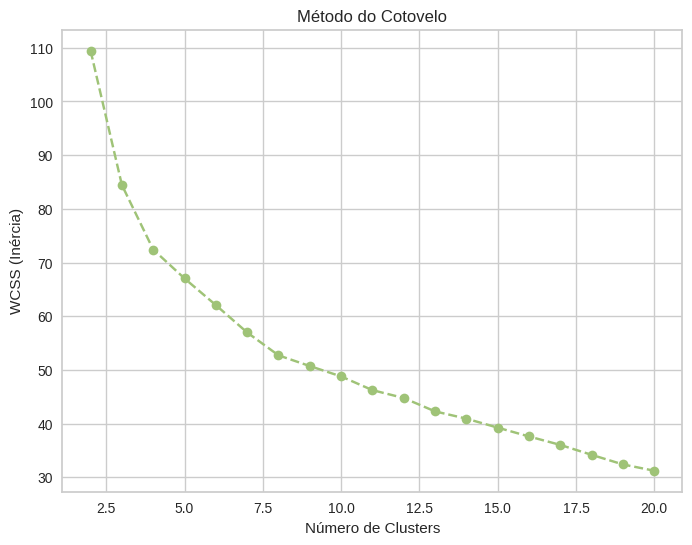

In [59]:
# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 21), wcss, marker='o', linestyle='--', color='g')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Inércia)')
plt.grid(True)
plt.show()

In [60]:
# Determinando o número ótimo de clusters
n_clusters_optimal = optimal_number_of_clusters(wcss)
print(f'O número ideal de clusters é: {n_clusters_optimal}')

O número ideal de clusters é: 7


In [61]:
# Criando o modelo K-means
model = KMeans(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

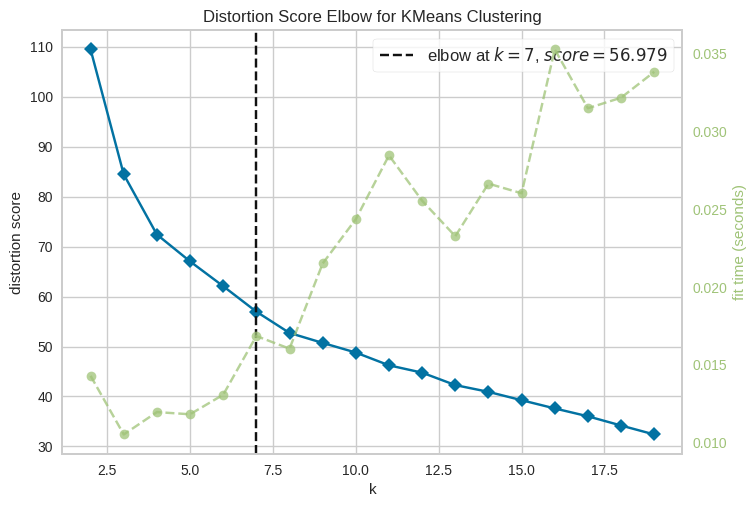

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Visualizando o método do cotovelo
visualizer = KElbowVisualizer(model, k=(2, 20))
visualizer.fit(df_scaled)
visualizer.show()

## O que o gráfico mostra:

- Eixo X (k): Representa o número de clusters testados
- Eixo Y (distortion score): Representa a soma dos quadrados das distâncias entre cada ponto de dados e o centro do cluster ao qual pertence (também chamada de inércia). Quanto menor o valor, melhor a clusterização, pois os pontos estão mais próximos de seus respectivos centros.
- Linha azul com marcadores: Mostra como a "distortion score" (pontuação de distorção) diminui à medida que o número de clusters (k) aumenta. Isso é esperado, pois com mais clusters, os pontos tendem a ficar mais próximos de seus centros.
- Linha tracejada vertical: Indica o "cotovelo" identificado pelo algoritmo, que neste caso sugere que o número ideal de clusters é k = 7.
- Eixo Y secundário (fit time): (em verde claro) Mostra o tempo que o algoritmo K-means levou para ajustar os dados para cada valor de k. Geralmente, o tempo de ajuste aumenta com o aumento de k.
- O "cotovelo" é o ponto no gráfico onde a taxa de diminuição da "distortion score" começa a se estabilizar. Adicionar mais clusters além desse ponto resulta em ganhos marginais na qualidade da clusterização, enquanto aumenta a complexidade do modelo.

## Nesse experimento:

- A linha azul mostra uma queda acentuada inicial na "distortion score" à medida que k aumenta, indicando que adicionar clusters melhora significativamente a clusterização.
- Em torno de k = 7, a curva começa a se achatar, formando o "cotovelo".
A partir de k = 7, a diminuição na "distortion score" é menos pronunciada, sugerindo que adicionar mais clusters não traz um benefício substancial.
- **Conclusão:** Com base neste gráfico do método do cotovelo, o número ideal de clusters para este conjunto de dados e para este modelo K-means específico é provavelmente 7. Essa escolha equilibra a qualidade da clusterização com a complexidade do modelo.

# Vizualização 2D

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


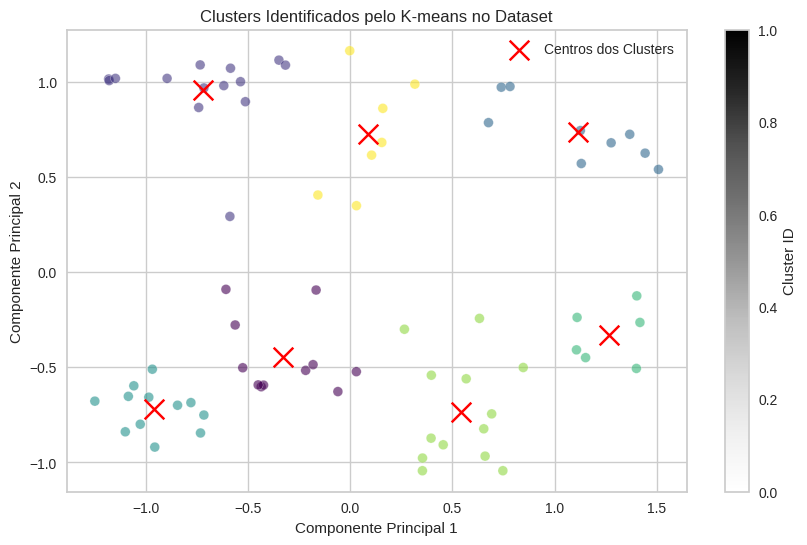

In [72]:
# Reduzir dimensionalidade para 2D usando PCA para visualização
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df_scaled)

# Aplicar K-means para encontrar clusters
kmeans = KMeans(n_clusters_optimal, random_state=42)
kmeans.fit(data_2d)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plotar os dados com os clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=50, cmap='viridis', alpha=0.6, edgecolors='w')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x', label='Centros dos Clusters')
plt.title('Clusters Identificados pelo K-means no Dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster ID')
plt.legend()
plt.show()